# Assignment 1

# Part 02

# Scope:
The scope of the assignment is to write a script add data Elastic Search based Backend database. Please note:

[INFO] 

1. Attached is the excel sheet from which data should be scraped and added to the the ES database.
2. Excel sheet name: beginner_assignment01
3. Excel sheet link: https://docs.google.com/spreadsheets/d/1cnPUhCbUm5p3DMWw6wcSu4li7qChBrhd-UyRkW2RSUg/edit?usp=sharing
4. Elastic Search endpoint: http://101.53.136.181:9200/
5. Kibana endpoint: http://101.53.136.181:5601/

[ACTION]
1. Write a script in any language to read the data given in the excel sheet and add this to the Elastic Search database.

    a. Use the ES endpoint given above and create an index of your own
    
    b. The index mapping should be defined based on the excel sheet given
    
    c. All ES changes should be done within your index and on the given ES cluster only.
    
[DELIVERY]
3. Following items should be delivered once completed as github repo link:

    a. The script code (documented and commented)
    
    b. The index mapping


In [1]:
from elasticsearch import Elasticsearch

In [2]:
HOST_URLS =['http://101.53.136.181:9200'] # End point of elastic search server
es_conn = Elasticsearch(HOST_URLS)

In [3]:
print('Cluster Name : ',es_conn.cluster.state(metric=['cluster_name']))

Cluster Name :  {'cluster_name': 'elasticsearch', 'compressed_size_in_bytes': 48044}


In [ ]:
# Creating index name

In [11]:
# Poduct listing
index_name = 'vishalproductlisting'
res = es_conn.indices.create(index=index_name, ignore = 400)
print(f'==res=={res}')

==res=={'acknowledged': True, 'shards_acknowledged': True, 'index': 'vishalproductlisting'}


In [12]:
# Group listing
index_name2 = 'vishalgrouplisting'
res = es_conn.indices.create(index=index_name2, ignore = 400)
print(f'==res=={res}')

==res=={'acknowledged': True, 'shards_acknowledged': True, 'index': 'vishalgrouplisting'}


# Converting data frame to csv file to split the excel file into : 

1 product listing

2 group listing

Note: I have splitted the dataframe into 2 csv files (mentioned above) because it will make my work easy to push csv file one by one into the index mapping code.

In [154]:
import pandas as pd

In [156]:
file = pd.ExcelFile('beginner_assignment02.xlsx')
df1 = pd.read_excel(file, 'product_listing')
df2 = pd.read_excel(file, 'group_listing')

In [157]:
df1.to_csv('product_listing.csv', index=False)
df2.to_csv('group_listing.csv', index = False)

In [158]:
print(f'shape of product_listing csv file is {df1.shape}')
print(f'shape of group_listing csv file is {df2.shape}')

shape of product_listing csv file is (110, 5)
shape of group_listing csv file is (22, 3)


# Below are the codes to create index as well as do mapping

In [160]:
# For product listing
from elasticsearch import helpers, Elasticsearch
import csv

HOST_URLS =['http://101.53.136.181:9200'] # End point of elastic search server
es = Elasticsearch(HOST_URLS)

with open('product_listing.csv') as file1:
    reader = csv.DictReader(file1)
    helpers.bulk(es, reader, index='vishal_product_listings_new', doc_type='product')

In [161]:
# For group listing 

from elasticsearch import helpers, Elasticsearch
import csv

HOST_URLS =['http://101.53.136.181:9200'] # End point of elastic search server
es = Elasticsearch(HOST_URLS)

with open('group_listing.csv') as file1:
    reader = csv.DictReader(file1)
    helpers.bulk(es, reader, index='vishal_group_listings_new', doc_type='product')

# Check for index name in 'http://101.53.136.181:9200/'

In [175]:
es.indices.get_alias('vishal_product_listings_new')

{'vishal_product_listings_new': {'aliases': {}}}

In [174]:
es.indices.get_alias('vishal_group_listings_new')

{'vishal_group_listings_new': {'aliases': {}}}

In [180]:
print('''
This shows that both the Indices (vishal_product_listings_new & vishal_group_listings_new) 
are present in the following Elasticsearch host : http://101.53.136.181:9200/
''')


This shows that both the Indices (vishal_product_listings_new & vishal_group_listings_new) 
are present in the following Elasticsearch host : http://101.53.136.181:9200/



#  Below are the screenshot of 'index mapping'

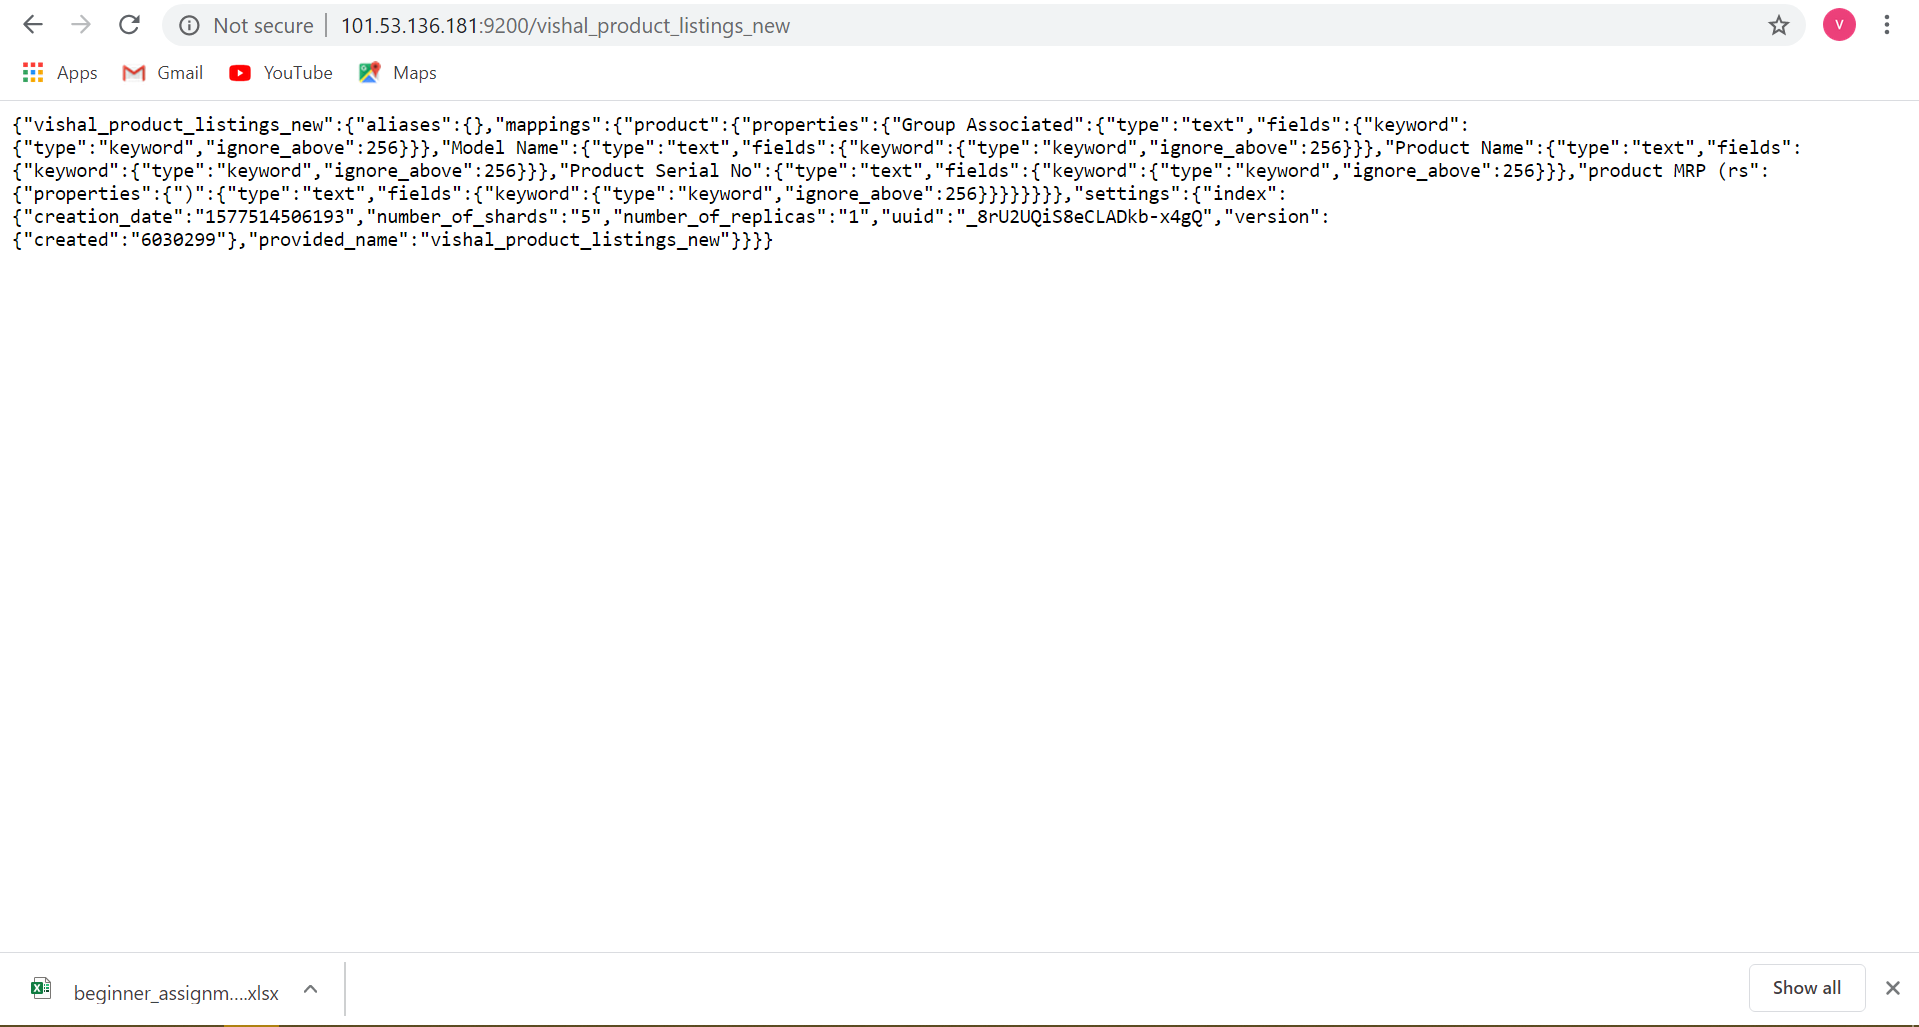

In [167]:
from PIL import Image   
img1 = Image.open("product_listing.png")  
img1

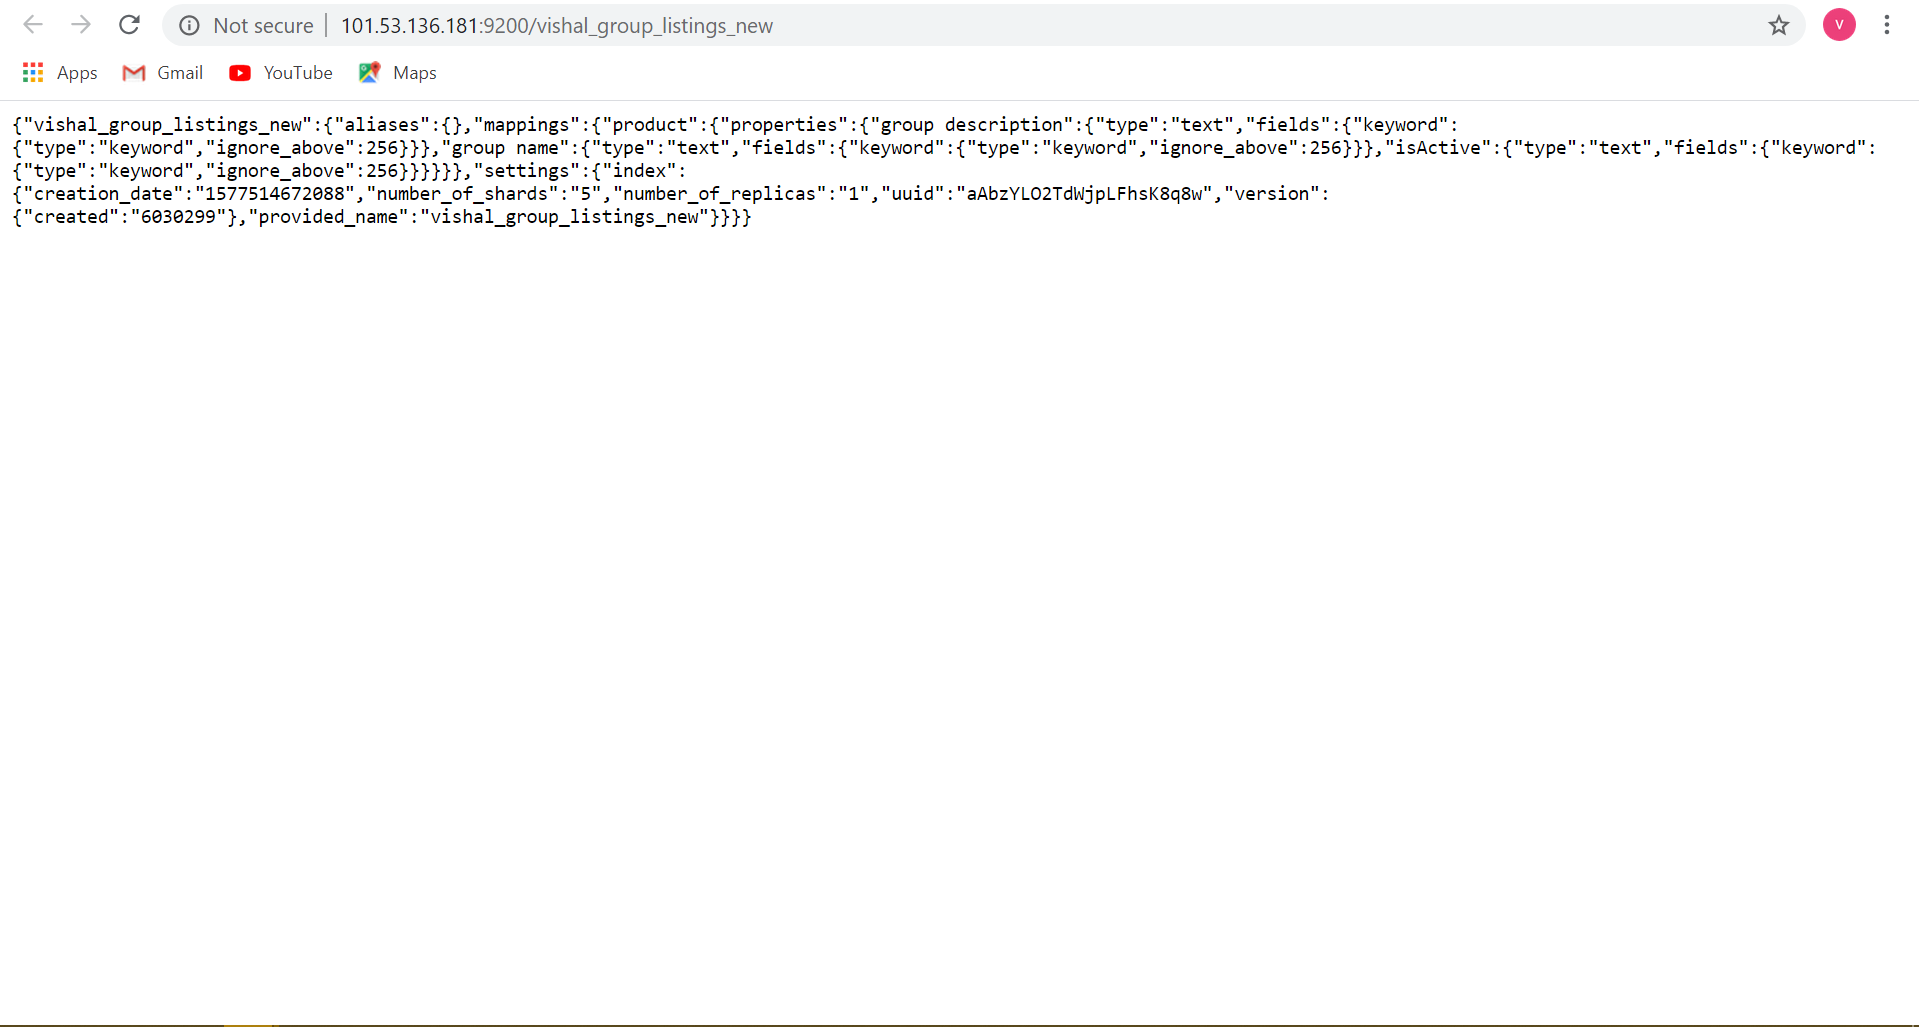

In [172]:
from PIL import Image   
img2 = Image.open("group_listing.png")  
img2
